In [2]:
from tensorflow.examples.tutorials.mnist import input_data

/home/rj/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rj/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rj/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rj/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: Futu

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
import numpy as np 


In [5]:
print("number of data points : ", mnist.train.images.shape[0],"number of pixels in each image :",mnist.train.images.shape[1])

number of data points :  55000 number of pixels in each image : 784


In [6]:
print("number of data points : ", mnist.test.labels.shape[0]," length of the one hot encoded label vector :",mnist.test.labels.shape[1])

number of data points :  10000  length of the one hot encoded label vector : 10


In [7]:
import tensorflow as tf

In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12911420328137013532
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7372129787730623136
physical_device_desc: "device: XLA_CPU device"
]


In [10]:
x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))


In [11]:
y = tf.nn.softmax(tf.matmul(x,W)+b)

In [12]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [13]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))

In [14]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [15]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [16]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x: batch_xs, y_:batch_ys})

In [18]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy,feed_dict={x:mnist.test.images, y_:mnist.test.labels}
))

0.9008


In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, y, y_1, ax, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
    fig.canvas.draw()

In [21]:
training_epochs = 15
batch_size = 1000
display_step = 1
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y,labels=y_))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)


<IPython.core.display.Javascript object>


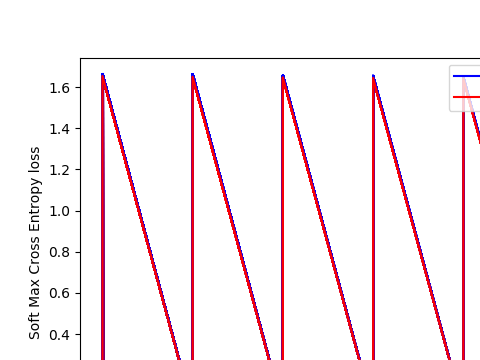

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ;
ax.set_ylabel('Soft Max Cross Entropy loss')
xs, ytrs, ytes = [], [], []
for epoch in range(training_epochs):
    train_avg_cost = 0.
    test_avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
        train_avg_cost += c / total_batch
        c = sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        test_avg_cost += c / total_batch
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax)
        
plt_dynamic(xs, ytrs, ytes, ax)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))